# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())
%load_ext autoreload
%autoreload 2
%tb

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


No traceback available to show.


In [3]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader
from tools.TrajectoryUtils import TrajectoryUtils

In [4]:
loader = Loader(dataDir, 'inD')

In [5]:
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True, precomputeSceneData=False)

INFO:root:recordingIds: [25]
INFO:root:Downsampling recording 25 from 25.0 to 2.5
downsampling: 100%|█████████████████████████████████████████████████████████| 672514/672514 [00:41<00:00, 16013.63it/s]


In [6]:
sceneId = 21
sceneConfig = {
      "centerXPixel": 302.5,
      "centerYPixel": 345.5,
      "centerX": 29.57,
      "centerY": -33.77,
      "angle": 16.0,
      "roadWidth": 9.0,
      "boxWidth": 15.0
    }
boxWidth = sceneConfig["boxWidth"]
roadWidth = sceneConfig["roadWidth"]
pedData = loc2data.getSceneCrossingDf(sceneId, boxWidth, roadWidth)
pedData.groupby(["uniqueTrackId"]).count()

crossing recording: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:27<00:00, 27.53s/it]


,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration,sceneId,roadWidth
uniqueTrackId,,,,,,,,,,,,,,,,,,,,
25117,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
25288,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
25300,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141
25445,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
25472,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97


In [7]:
otherData = loc2data.getSceneOtherDf(sceneId)

other recording: 100%|███████████████████████████████████████████████████████████████████| 1/1 [01:07<00:00, 67.79s/it]


In [9]:
from extractors.SceneData import SceneData
sceneData = SceneData(
    2,
    0.00814636091724502,
    sceneId,
    sceneConfig,
    boxWidth,
    roadWidth,
    pedData=pedData,
    otherData=otherData,
    backgroundImagePath="G:AV datasets/inD-dataset-v1.0/data/18_background.png"
)

sceneData.buildLocalInformation()
# print(sceneData.warnings)

clipping ped trajectories for scene # 21 with width offset 4.0: 100%|████████████████████| 5/5 [00:00<00:00, 50.51it/s]
clipping other trajectories for scene # 21: 100%|████████████████████████████████████| 205/205 [00:02<00:00, 84.41it/s]
INFO:root:adding dynamics for scene 21
clipping ped trajectories for scene # 21 with width offset 0.0: 100%|███████████████████| 5/5 [00:00<00:00, 104.10it/s]


ped 25117: enters the scene 2 times
ped 25368: enters the scene 2 times
ped 25117: Disregarding as the length 6.815681728879231 is too short or rows too less (14)
ped 25445: Disregarding as the length 4.920438674556486 is too short or rows too less (26)
Clipping after trimming lost 2 pedestrian tracks: {25117, 25445}


In [19]:
print(sceneData.problematicIds)

{'ped': {25445, 25117}, 'other': set()}


In [10]:
# trackId = 25117
localPedData = sceneData.getPedDataInSceneCoordinates()
# localPedData[localPedData["uniqueTrackId"]==trackId]
localPedData.groupby(["uniqueTrackId"]).size()

uniqueTrackId
25288    16
25300    13
25472    21
dtype: int64

In [11]:

localOtherData = sceneData.getOtherDataInSceneCoordinates()
# localPedData[localPedData["uniqueTrackId"]==trackId]
localOtherData.groupby(["uniqueTrackId"]).size()

uniqueTrackId
25000    16
25003    23
25007    28
25008    40
25021    41
         ..
25529    25
25532    26
25535    21
25536    16
25538     1
Length: 205, dtype: int64

In [ ]:
# pedData[(pedData["uniqueTrackId"]==trackId)]

In [ ]:

# pedData.groupby(["uniqueTrackId"]).count()

In [12]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [13]:
# sceneData.sceneConfig
# sceneData.orthoPxToMeter

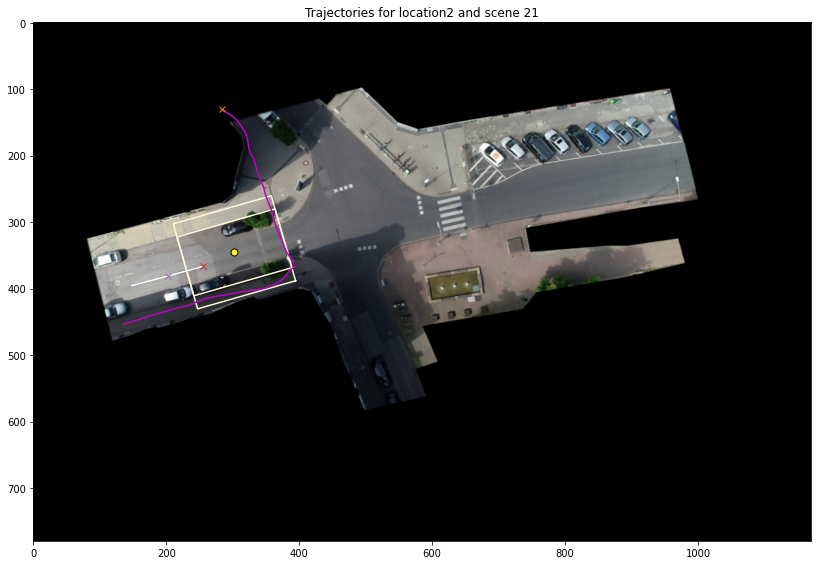

In [14]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[25538, 25117])

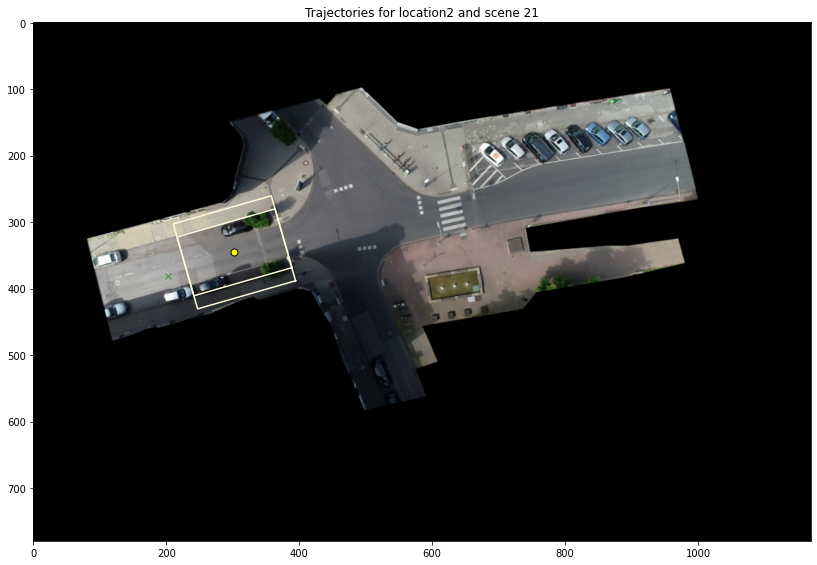

In [15]:
visualizer.showLocationSceneData(sceneData, onlyClipped=True, showLocal=False, showOthers=True, ids=[25538, 25117])

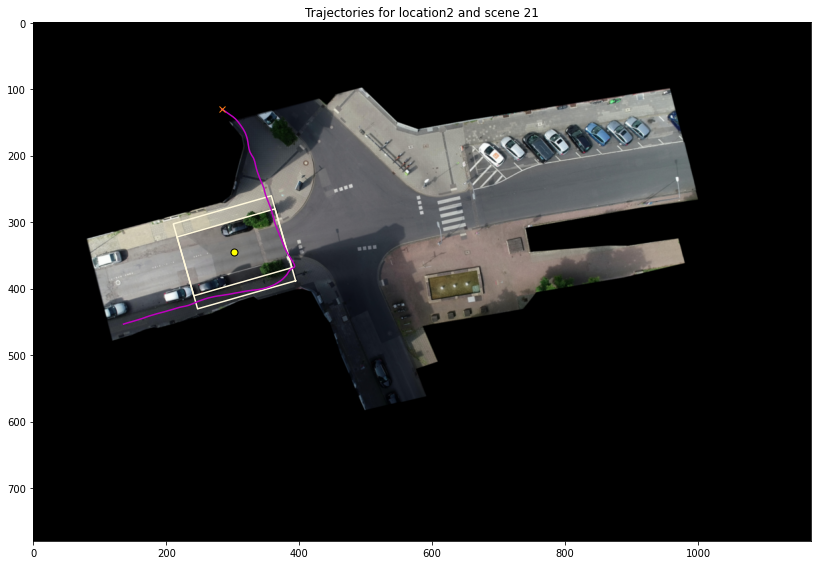

In [16]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[25117])

In [ ]:
ped25117 = pedData[pedData["uniqueTrackId"]==25117]

In [ ]:
ped25117.to_csv("../data/ped25117.csv")

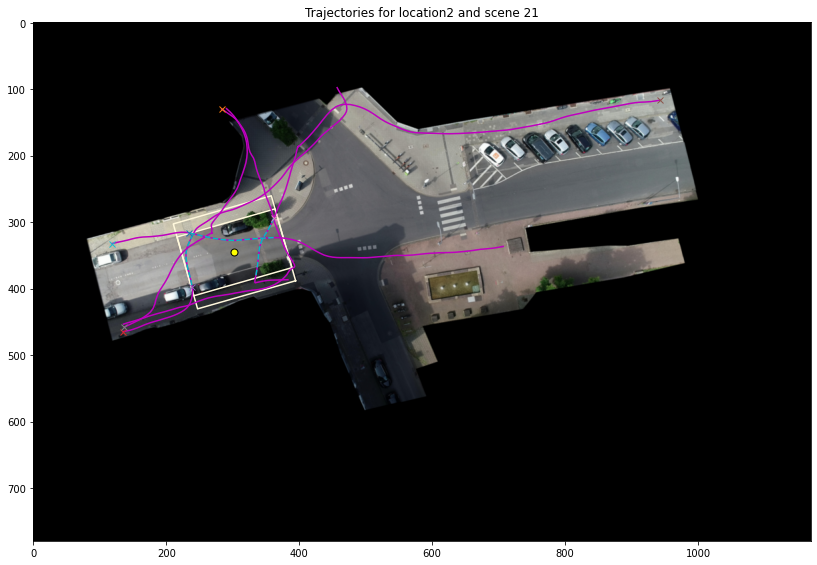

In [17]:
# visualize all peds
from math import ceil
allPedIds = sceneData.uniquePedIds()
limit = 10
nPedIds = len(allPedIds)
nPages = ceil(nPedIds / limit)
for page in range(nPages):
    offset = page * limit
    visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=False, offset=offset, limit=limit)